# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

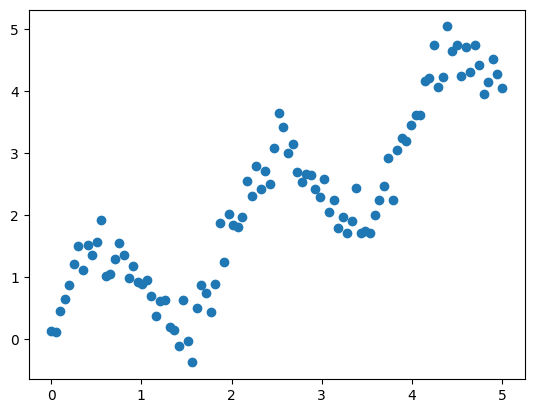

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5268539858613367


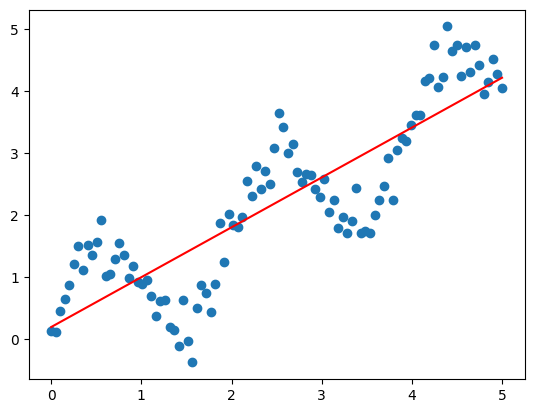

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

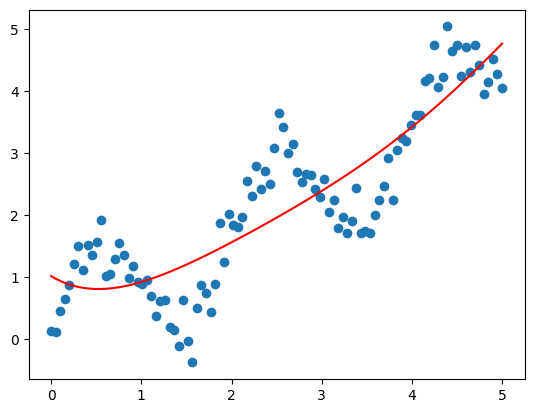

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.87201918  1.0829716  -0.36251603  0.06114784 -0.00379888]
interception:  1.015092799761232


In [16]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.0150928 , 0.97376752, 0.93769237, 0.90660127, 0.88023739,
       0.85835301, 0.84070936, 0.82707644, 0.81723295, 0.81096604,
       0.80807124, 0.80835227, 0.81162091, 0.81769682, 0.82640743,
       0.83758778, 0.85108032, 0.86673484, 0.88440827, 0.90396455,
       0.92527444, 0.94821544, 0.97267159, 0.99853333, 1.02569735,
       1.05406644, 1.08354935, 1.11406065, 1.14552053, 1.1778547 ,
       1.21099424, 1.2448754 , 1.27943951, 1.3146328 , 1.35040626,
       1.38671546, 1.42352045, 1.46078558, 1.49847935, 1.53657428,
       1.57504672, 1.61387675, 1.653048  , 1.69254751, 1.73236556,
       1.77249555, 1.81293385, 1.8536796 , 1.89473464, 1.93610329,
       1.97779225, 2.01981039, 2.06216869, 2.10488   , 2.14795893,
       2.19142174, 2.23528609, 2.27957099, 2.3242966 , 2.36948408,
       2.41515547, 2.46133351, 2.50804148, 2.55530311, 2.60314236,
       2.65158331, 2.70065001, 2.75036631, 2.80075573, 2.85184128,
       2.90364537, 2.9561896 , 3.00949462, 3.06358002, 3.11846

In [18]:
print(W.shape)
print(b.shape)

(5,)
()


In [19]:
regr_poly.predict(X_poly)

array([1.0150928 , 0.97376752, 0.93769237, 0.90660127, 0.88023739,
       0.85835301, 0.84070936, 0.82707644, 0.81723295, 0.81096604,
       0.80807124, 0.80835227, 0.81162091, 0.81769682, 0.82640743,
       0.83758778, 0.85108032, 0.86673484, 0.88440827, 0.90396455,
       0.92527444, 0.94821544, 0.97267159, 0.99853333, 1.02569735,
       1.05406644, 1.08354935, 1.11406065, 1.14552053, 1.1778547 ,
       1.21099424, 1.2448754 , 1.27943951, 1.3146328 , 1.35040626,
       1.38671546, 1.42352045, 1.46078558, 1.49847935, 1.53657428,
       1.57504672, 1.61387675, 1.653048  , 1.69254751, 1.73236556,
       1.77249555, 1.81293385, 1.8536796 , 1.89473464, 1.93610329,
       1.97779225, 2.01981039, 2.06216869, 2.10488   , 2.14795893,
       2.19142174, 2.23528609, 2.27957099, 2.3242966 , 2.36948408,
       2.41515547, 2.46133351, 2.50804148, 2.55530311, 2.60314236,
       2.65158331, 2.70065001, 2.75036631, 2.80075573, 2.85184128,
       2.90364537, 2.9561896 , 3.00949462, 3.06358002, 3.11846

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [20]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [21]:
sigma = 0.3

In [24]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [23]:
print(X_rbf.shape)

(100, 5)


In [28]:
regr_rbf = LinearRegression()

In [29]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

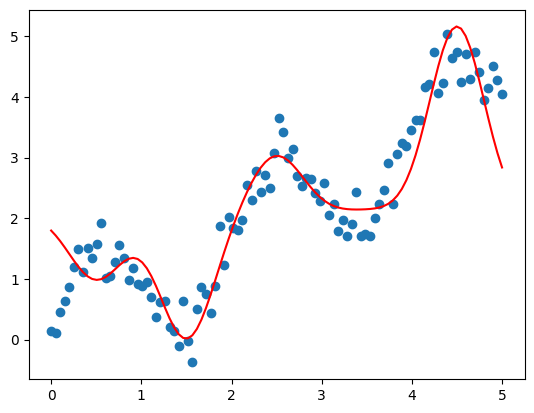

In [30]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [31]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.07207644 -2.04731477  0.96980035  0.06822115  3.09382523]
interception:  2.064328956802766


#### Comparison

In [32]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

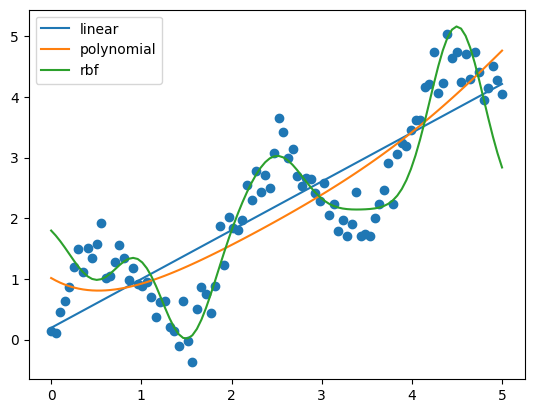

In [33]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [34]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5268539858613367


In [35]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4544340120686087


In [36]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2493333970069897
